In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from numpy import random

- Write code for a simple model with at least one parameter (like coin probability, normal distr. mean, etc.) and an observable related to that parameter

- Create a figure of the "Neyman Construction" (see March 23 lecture), i.e. make a 2D plot with "true" parameter value on the x-axis and "measured" value on the y-axis, sampling many random experiments for each true value 

- Bonus (not worth additional points) - pretend that you did the experiment and measured a particular value of the parameter. What are the "error"'s/what is the posterior distribution for the parameter after the measurement? (you can get this from your 2D plot by looking at the 1D slice from the 2D histogram corresponding to the "measured" value).

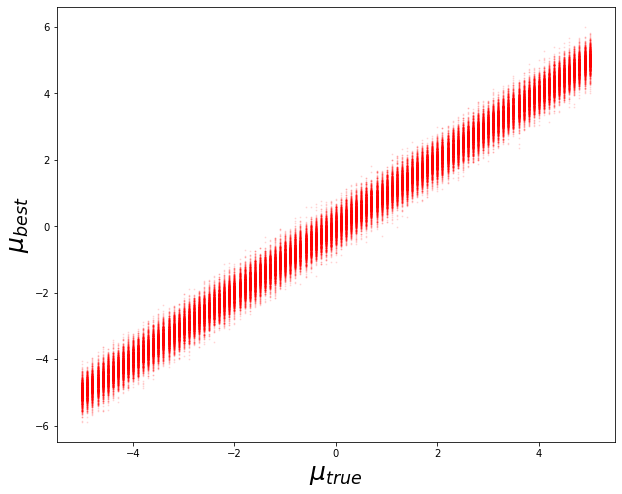

In [129]:
#for each slice of mu_true, run Nexp number of experiments (to fill in the vertical dist.)
Nexp = 1000

#slice of mu_true
Nmeas = 50

#evenly sample mu_true values on the x-axis (-5, -4.99, -4.98, ... , 4.98, 4.99, 5)
#for each, run Nexp experiments, with Nmeas per experiment
#calculate the mean mu...mu_best += x, then mu_best/Nexp outside of loop
#THEN scatterplot.


#let us assume sigma = 2, because I can.
sigma = 2

mu_true_list = np.arange(-5,5.1,0.1)

#preparing "empty canvas" for plotting
plt.figure(figsize=(10,8))

mu_best_tot = []
x_array_tot = []
for x in mu_true_list:
    mu_true = x
    mu_best_list = []
    for y in range(0,Nexp):
        mu_best = 0
        for z in range(0,Nmeas):
            
            #pull pesudo-random number from normal distribution
            #assume mu_best distribution follows a normal curve
            num = np.random.normal(mu_true,sigma)
            mu_best += num
            
        mu_best = mu_best/Nmeas
        mu_best_list.append(mu_best)
        
        #mu_best_tot holds ALL values of mu_best once loops are completed --> used below.
        mu_best_tot.append(mu_best)
    
    #create an array of mu_true values with which to plot the mu_best 
    x_array = np.zeros(Nexp)+mu_true
    
    #x_array_tot holds ALL x-array values once loops are completed --> used below.
    x_array_tot = np.concatenate((x_array_tot,x_array),axis=None)
    
    plt.scatter(x_array,mu_best_list,color='r',alpha=0.1,s=1)



plt.xlabel(r'$\mu_{true}$',fontsize=25)
plt.ylabel(r'$\mu_{best}$',fontsize=25)

mu_best_tot = np.asarray(mu_best_tot)        
x_array_tot = np.asarray(x_array_tot)
    
#TO SUMMARIZE,    
    
#for each x in mu_true_list (that is, mu_true from -5 to 5 (with 0.1 subintervals)),
#look at each experiment
#look at each measurement comprising one experiment
#assuming mu_best is distributed according to a normal curve,
#extract one mu_best from this distribution and add the result to mu_best_tot (which I simply denote mu_best)
#divide this total by the number of measurements to find the mean mu_best
#NOTE --> The suggestion to try a scatterplot is courtesy of Ryan Scott!
#thennnnnn, plot that number of data points on a scatterplot (because, well, I have failed to determine how
#to correctly implement 2D hisogram filling), with as many x array entries (with the same value, ensuring that
#the points form a vertical line for this particular value of mu_true) as there are Nexp!

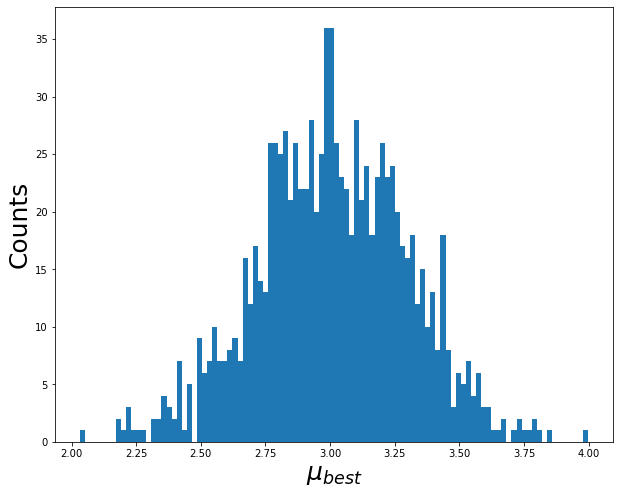

In [125]:
#generating 1D histogram for vertical slice of mu_true to demonstrate that the shape effectively matches that
#of the 2D histogram from the in-class Neyman construction example 

#be sure each of the below variables are consistent with those above...

Nexp = 1000
Nmeas = 50
sigma = 2

#let mu_best test be 3
mu_true_test = 3

mu_true_list = np.arange(-5,5.1,0.1)

#if mu_true is about the value of mu_best_test, then generate histogram of horizontal slice.

for x in mu_true_list:
    if float(x) > mu_true_test-0.01 and float(x) < mu_true_test + 0.01:
        mu_true = x
        mu_best_list = []
        for y in range(0,Nexp):
            mu_best = 0
            for z in range(0,Nmeas):
                #generates pseudo-random integer from 0 to 100
                #will use this integer as an index with which to isolate
                #some y-value of Gaussian distribution with mu_true, sigma=2
                #index = int(random.random()*100)
                #pull number from Gaussian distribution
                #num = norm.pdf(x,sigma)[index]
            
                #the more concise approach...pulling some number from normal distribution
                #assume mu_best distribution follows a normal curve
                num = np.random.normal(mu_true,sigma)
                mu_best += num
            
            mu_best = mu_best/Nmeas
            mu_best_list.append(mu_best)
    
    
        plt.figure(figsize=(10,8))
        plt.hist(mu_best_list,bins=100)
        plt.xlabel(r'$\mu_{best}$',fontsize=25)
        plt.ylabel(r'Counts',fontsize=25)
                
    else:
        continue


Text(-5.3, 4.2, '$\\mu_{best}=$2.0$^{+ 0.8}_{- 0.9}$')

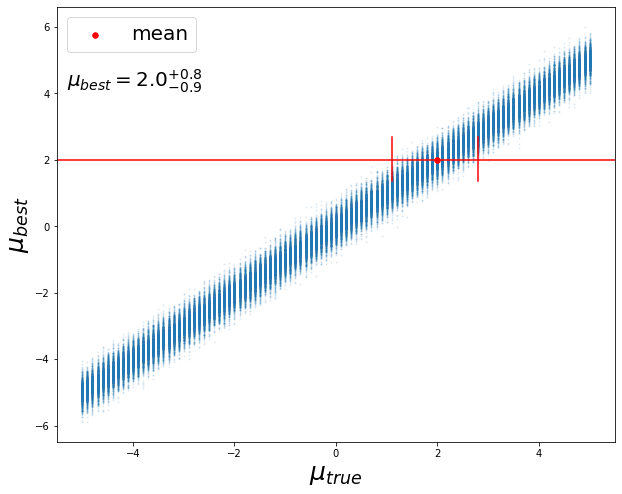

In [170]:
#let's try to find the uncertainty associated with [mu_best = 2]
#first isolate elements in mu_best_tot array wherein the mu_best values are approximately 2; 
#that is, where they intersect the red horizontal line (y=2) drawn below.

mu_best_test = 2

flag = (mu_best_tot >= 1.99) & (mu_best_tot <= 2.01)

#then identify the mu_true (that is, the x values) in x_array_tot associated with these 
#points. 

x_array_tot_flag = x_array_tot[flag]

#lastly, find the min and max of this truncated array --> these will constitute the bounds
#for the "horizontal slice" through the Neyman construction.

minimum = np.min(x_array_tot_flag)
maximum = np.max(x_array_tot_flag)

plt.figure(figsize=(10,8))
plt.scatter(x_array_tot,mu_best_tot,s=1,alpha=0.1)
plt.axhline(2,color='r')

plt.scatter(2,2,s=30,color='r',label='mean')

plt.xlabel(r'$\mu_{true}$',fontsize=25)
plt.ylabel(r'$\mu_{best}$',fontsize=25)

plt.axvline(minimum,ymin=0.6,ymax=0.7,color='r')
plt.axvline(maximum,ymin=0.6,ymax=0.7,color='r')
plt.legend(fontsize=20)

plt.text(-5.3,4.2,r'$\mu_{best}=$%0.1f'%(mu_best_test)+r'$^{+ %0.1f}'%(maximum-mu_best_test)+r'_{- %0.1f}$'%(mu_best_test-minimum),fontsize=20)





